## Time Shifting

* 시간의 차(Time Lag) 분석 필요
  * ex) 30일 전에 비해 주가는 상승세인가?
* Pandas 내 Time shifting 기능으로 time window를 기준으로 기간간 차이 분석
  * 여기서 time window는 resample에서 freq과 비슷함

In [1]:
import pandas as pd
import os

In [3]:
DATA_DIR = "bike_sharing_demand"
TRAIN_PATH = os.path.join(DATA_DIR, "train.csv")

df = pd.read_csv(TRAIN_PATH, parse_dates = ['datetime'])
df.set_index("datetime", inplace = True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
monthly_avg = df["count"].resample("M").mean()
monthly_avg.head(3)

datetime
2011-01-31    54.645012
2011-02-28    73.641256
2011-03-31    86.849776
Freq: M, Name: count, dtype: float64

* shifting은 periods만큼 밀리는 것을 의미함.

In [6]:
monthly_avg.shift(periods = 2, fill_value = 0)

datetime
2011-01-31      0.000000
2011-02-28      0.000000
2011-03-31     54.645012
2011-04-30     73.641256
2011-05-31     86.849776
2011-06-30    111.026374
2011-07-31    174.809211
2011-08-31    196.877193
2011-09-30    203.614035
2011-10-31    182.666667
2011-11-30    174.622517
2011-12-31    174.773626
2012-01-31    155.458333
2012-02-29    134.173246
2012-03-31    124.353201
2012-04-30    145.646154
2012-05-31    208.276923
2012-06-30    257.455947
2012-07-31    264.109649
2012-08-31    287.186404
2012-09-30    267.037281
2012-10-31    285.570175
2012-11-30    292.598684
2012-12-31    280.508772
Freq: M, Name: count, dtype: float64

* 실무에서 사용할 때는 한 단위의 periods씩 shifting해서 df로 만들어서 분석

In [9]:
monthly_avg = df["count"].resample("M").mean()
result = []
result.append(monthly_avg)

for period in range(1, 6):
    temp_avg = monthly_avg.shift(periods = period, fill_value = 0)
    temp_avg = temp_avg.rename("{}_month_shift".format(period))
    result.append(temp_avg)

pd.concat(result, axis = 1)

,count,1_month_shift,2_month_shift,3_month_shift,4_month_shift,5_month_shift
datetime,,,,,,
2011-01-31,54.645012,0.000000,0.000000,0.000000,0.000000,0.000000
2011-02-28,73.641256,54.645012,0.000000,0.000000,0.000000,0.000000
2011-03-31,86.849776,73.641256,54.645012,0.000000,0.000000,0.000000
2011-04-30,111.026374,86.849776,73.641256,54.645012,0.000000,0.000000
2011-05-31,174.809211,111.026374,86.849776,73.641256,54.645012,0.000000
2011-06-30,196.877193,174.809211,111.026374,86.849776,73.641256,54.645012
2011-07-31,203.614035,196.877193,174.809211,111.026374,86.849776,73.641256
2011-08-31,182.666667,203.614035,196.877193,174.809211,111.026374,86.849776
2011-09-30,174.622517,182.666667,203.614035,196.877193,174.809211,111.026374


## Moving average

* 시계열 데이터는 노이즈 발생
  * 노이즈를 줄이면서 추세보기, 이동평균법

<AxesSubplot:xlabel='datetime'>

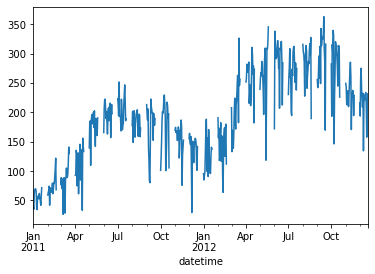

In [24]:
# 일별 자전거 수요량의 평균
day_avg = df["count"].resample("D").mean()
day_avg.plot()

* 위의 `day_avg`는 NaN 값이 존재해서 fillna(0)을 해주어야 함.

<AxesSubplot:xlabel='datetime'>

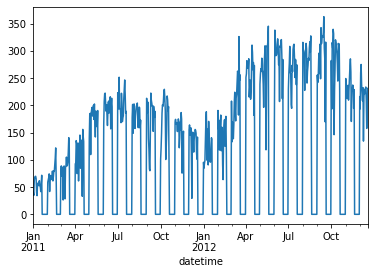

In [25]:
day_avg = df["count"].resample("D").mean().fillna(0)
day_avg.plot()

* NaN값(0으로 대체한 값)을 포함한 추세선

<AxesSubplot:xlabel='datetime'>

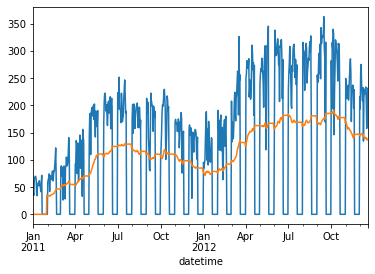

In [29]:
day_avg.plot()
day_avg.rolling(window = 30).mean().fillna(0).plot()

## Cumsum (Cumulative sum)

* 시계열 데이터를 window마다 합침
* rolling(window = 10).sum() 과 다름

In [35]:
monthly_avg = df["count"].resample("M").mean()
cumsum_avg = df["count"].resample("M").mean().cumsum()
monthly_avg = monthly_avg.rename("monthly_avg")
cumsum_avg = cumsum_avg.rename("avg_cumsum")

df_monthly = pd.concat([monthly_avg, cumsum_avg], axis = 1)
df_monthly

,monthly_avg,avg_cumsum
datetime,,
2011-01-31,54.645012,54.645012
2011-02-28,73.641256,128.286267
2011-03-31,86.849776,215.136043
2011-04-30,111.026374,326.162417
2011-05-31,174.809211,500.971627
2011-06-30,196.877193,697.848820
2011-07-31,203.614035,901.462855
2011-08-31,182.666667,1084.129522
2011-09-30,174.622517,1258.752038


* `secondary_y = True`: y 보조축 사용

<AxesSubplot:>

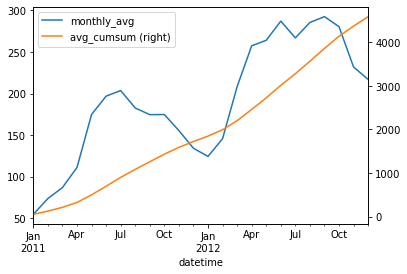

In [39]:
ax = df_monthly.plot(y="monthly_avg", use_index=True)
df_monthly.plot(y="avg_cumsum", secondary_y = True, ax=ax, use_index=True)
# ax는 일종의 판의 역할